In [1]:
import sys
import os
import pandas as pd
import numpy as np

In [2]:
sys.path.append("..")

In [3]:
from src.utils.constants import get_folders_constants, get_scraping_constants
from src.utils.folders import get_root_folder

In [4]:
files = list(filter(lambda filename: filename.endswith('csv'),os.listdir(get_folders_constants()['RAW_CSV_BASE_FILEPATH'])))
files

['advanced_stats_full_dataset_raw_1990_2022.csv',
 'per_100_possesions_stats_full_dataset_raw_1990_2022.csv',
 'per_game_stats_full_dataset_raw_1990_2022.csv',
 'season_total_stats_full_dataset_raw_1990_2022.csv']

# Creating wins and losses dataset

## Getting dataset

We will need to create it from the advanced stats dataset

In [5]:
advanced_stats_full_dataset_raw_1990_2022_path = os.path.join(get_folders_constants()['RAW_CSV_BASE_FILEPATH'], files[0])
advanced_stats_full_dataset_raw_1990_2022_df = pd.read_csv(advanced_stats_full_dataset_raw_1990_2022_path)

In [6]:
advanced_stats_full_dataset_raw_1990_2022_df.head()

,Unnamed: 0.1,Unnamed: 0,Rk,Team,Age,W,L,PW,PL,MOV,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,0,0,1.0,Los Angeles Lakers*,28.9,63.0,19.0,58,24,6.78,...,0.271,NaN,0.479,12.8,68.5,0.219,NaN,Great Western Forum,712498.0,NaN
1,1,1,2.0,Phoenix Suns*,26.7,54.0,28.0,58,24,7.10,...,0.302,NaN,0.478,12.8,68.8,0.209,NaN,Arizona Veterans Memorial Coliseum,578661.0,NaN
2,2,2,3.0,Detroit Pistons*,29.5,59.0,23.0,57,25,6.09,...,0.245,NaN,0.461,13.7,70.3,0.262,NaN,The Palace of Auburn Hills,879705.0,NaN
3,3,3,4.0,Portland Trail Blazers*,26.7,59.0,23.0,57,25,6.32,...,0.269,NaN,0.479,15.2,70.8,0.265,NaN,Memorial Coliseum,528132.0,NaN
4,4,4,5.0,Philadelphia 76ers*,27.4,53.0,29.0,54,28,4.99,...,0.281,NaN,0.495,13.3,68.4,0.223,NaN,The Spectrum,565926.0,NaN


## Removing first 2 columns with the Unnamed pattern

In [7]:
advanced_stats_full_dataset_interim_1990_2022_df = advanced_stats_full_dataset_raw_1990_2022_df[advanced_stats_full_dataset_raw_1990_2022_df.columns[2:]].copy()

In [8]:
advanced_stats_full_dataset_interim_1990_2022_df

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,Los Angeles Lakers*,28.9,63.0,19.0,58,24,6.78,-0.04,6.74,...,0.271,NaN,0.479,12.8,68.5,0.219,NaN,Great Western Forum,712498.0,NaN
1,2.0,Phoenix Suns*,26.7,54.0,28.0,58,24,7.10,-0.01,7.09,...,0.302,NaN,0.478,12.8,68.8,0.209,NaN,Arizona Veterans Memorial Coliseum,578661.0,NaN
2,3.0,Detroit Pistons*,29.5,59.0,23.0,57,25,6.09,-0.68,5.41,...,0.245,NaN,0.461,13.7,70.3,0.262,NaN,The Palace of Auburn Hills,879705.0,NaN
3,4.0,Portland Trail Blazers*,26.7,59.0,23.0,57,25,6.32,0.16,6.48,...,0.269,NaN,0.479,15.2,70.8,0.265,NaN,Memorial Coliseum,528132.0,NaN
4,5.0,Philadelphia 76ers*,27.4,53.0,29.0,54,28,4.99,-0.75,4.23,...,0.281,NaN,0.495,13.3,68.4,0.223,NaN,The Spectrum,565926.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,27.0,Orlando Magic,23.3,22.0,60.0,21,61,-8.00,0.33,-7.67,...,0.175,NaN,0.532,11.7,77.2,0.196,NaN,Amway Center,622881.0,15192.0
992,28.0,Oklahoma City Thunder,22.4,24.0,58.0,21,61,-8.10,0.20,-7.90,...,0.169,NaN,0.533,11.8,76.1,0.169,NaN,Paycom Center,595112.0,14515.0
993,29.0,Houston Rockets,24.1,20.0,62.0,21,61,-8.48,0.22,-8.26,...,0.202,NaN,0.554,12.3,74.4,0.206,NaN,Toyota Center,638977.0,15585.0
994,30.0,Portland Trail Blazers,25.6,27.0,55.0,20,62,-8.88,0.33,-8.55,...,0.188,NaN,0.559,12.7,76.9,0.222,NaN,Moda Center,705608.0,17210.0


## Adding season prop to the dataset

The easiest way is to add the year until the name is league average or until the rank is `NaN`

In [9]:
def add_season_to_dataframe(team_series):
    FINAL_YEAR = get_scraping_constants()['LAST_YEAR']
    INITIAL_YEAR = FINAL_YEAR - get_scraping_constants()['N_PREVIOUS_YEARS']
    current_year = INITIAL_YEAR
    
    def get_season_year(team_name):
        nonlocal current_year
        if team_name == 'League Average':
            current_year += 1
            return 0
        return current_year
    
    get_season_year_vectorized = np.vectorize(get_season_year)
    return get_season_year_vectorized(team_series)

In [10]:
advanced_stats_full_dataset_interim_1990_2022_df['Season'] = add_season_to_dataframe(advanced_stats_full_dataset_interim_1990_2022_df.Team)
advanced_stats_full_dataset_interim_1990_2022_df.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G,Season
0,1.0,Los Angeles Lakers*,28.9,63.0,19.0,58,24,6.78,-0.04,6.74,...,NaN,0.479,12.8,68.5,0.219,NaN,Great Western Forum,712498.0,NaN,1990
1,2.0,Phoenix Suns*,26.7,54.0,28.0,58,24,7.10,-0.01,7.09,...,NaN,0.478,12.8,68.8,0.209,NaN,Arizona Veterans Memorial Coliseum,578661.0,NaN,1990
2,3.0,Detroit Pistons*,29.5,59.0,23.0,57,25,6.09,-0.68,5.41,...,NaN,0.461,13.7,70.3,0.262,NaN,The Palace of Auburn Hills,879705.0,NaN,1990
3,4.0,Portland Trail Blazers*,26.7,59.0,23.0,57,25,6.32,0.16,6.48,...,NaN,0.479,15.2,70.8,0.265,NaN,Memorial Coliseum,528132.0,NaN,1990
4,5.0,Philadelphia 76ers*,27.4,53.0,29.0,54,28,4.99,-0.75,4.23,...,NaN,0.495,13.3,68.4,0.223,NaN,The Spectrum,565926.0,NaN,1990


## Removing league average summary row

In [11]:
advanced_stats_full_dataset_interim_1990_2022_df = advanced_stats_full_dataset_interim_1990_2022_df.drop(
    advanced_stats_full_dataset_interim_1990_2022_df[advanced_stats_full_dataset_interim_1990_2022_df.Season == 0].index
).reset_index(drop = True)
advanced_stats_full_dataset_interim_1990_2022_df

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G,Season
0,1.0,Los Angeles Lakers*,28.9,63.0,19.0,58,24,6.78,-0.04,6.74,...,NaN,0.479,12.8,68.5,0.219,NaN,Great Western Forum,712498.0,NaN,1990
1,2.0,Phoenix Suns*,26.7,54.0,28.0,58,24,7.10,-0.01,7.09,...,NaN,0.478,12.8,68.8,0.209,NaN,Arizona Veterans Memorial Coliseum,578661.0,NaN,1990
2,3.0,Detroit Pistons*,29.5,59.0,23.0,57,25,6.09,-0.68,5.41,...,NaN,0.461,13.7,70.3,0.262,NaN,The Palace of Auburn Hills,879705.0,NaN,1990
3,4.0,Portland Trail Blazers*,26.7,59.0,23.0,57,25,6.32,0.16,6.48,...,NaN,0.479,15.2,70.8,0.265,NaN,Memorial Coliseum,528132.0,NaN,1990
4,5.0,Philadelphia 76ers*,27.4,53.0,29.0,54,28,4.99,-0.75,4.23,...,NaN,0.495,13.3,68.4,0.223,NaN,The Spectrum,565926.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,26.0,Detroit Pistons,23.6,23.0,59.0,22,60,-7.72,0.37,-7.36,...,NaN,0.541,13.1,75.6,0.226,NaN,Little Caesars Arena,663556.0,16184.0,2022
959,27.0,Orlando Magic,23.3,22.0,60.0,21,61,-8.00,0.33,-7.67,...,NaN,0.532,11.7,77.2,0.196,NaN,Amway Center,622881.0,15192.0,2022
960,28.0,Oklahoma City Thunder,22.4,24.0,58.0,21,61,-8.10,0.20,-7.90,...,NaN,0.533,11.8,76.1,0.169,NaN,Paycom Center,595112.0,14515.0,2022
961,29.0,Houston Rockets,24.1,20.0,62.0,21,61,-8.48,0.22,-8.26,...,NaN,0.554,12.3,74.4,0.206,NaN,Toyota Center,638977.0,15585.0,2022


## Add a playoffs classification column

In [12]:
advanced_stats_full_dataset_interim_1990_2022_df['Playoffs'] = (advanced_stats_full_dataset_interim_1990_2022_df.Team.str.endswith('*')).astype(int)

## Dropping the Rk column (it's not related to final positions but to order in table)

In [13]:
advanced_stats_full_dataset_interim_1990_2022_df = advanced_stats_full_dataset_interim_1990_2022_df.drop('Rk', axis = 1)

In [14]:
advanced_stats_full_dataset_interim_1990_2022_df

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G,Season,Playoffs
0,Los Angeles Lakers*,28.9,63.0,19.0,58,24,6.78,-0.04,6.74,114.0,...,0.479,12.8,68.5,0.219,NaN,Great Western Forum,712498.0,NaN,1990,1
1,Phoenix Suns*,26.7,54.0,28.0,58,24,7.10,-0.01,7.09,113.1,...,0.478,12.8,68.8,0.209,NaN,Arizona Veterans Memorial Coliseum,578661.0,NaN,1990,1
2,Detroit Pistons*,29.5,59.0,23.0,57,25,6.09,-0.68,5.41,109.9,...,0.461,13.7,70.3,0.262,NaN,The Palace of Auburn Hills,879705.0,NaN,1990,1
3,Portland Trail Blazers*,26.7,59.0,23.0,57,25,6.32,0.16,6.48,110.5,...,0.479,15.2,70.8,0.265,NaN,Memorial Coliseum,528132.0,NaN,1990,1
4,Philadelphia 76ers*,27.4,53.0,29.0,54,28,4.99,-0.75,4.23,113.5,...,0.495,13.3,68.4,0.223,NaN,The Spectrum,565926.0,NaN,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,Detroit Pistons,23.6,23.0,59.0,22,60,-7.72,0.37,-7.36,106.0,...,0.541,13.1,75.6,0.226,NaN,Little Caesars Arena,663556.0,16184.0,2022,0
959,Orlando Magic,23.3,22.0,60.0,21,61,-8.00,0.33,-7.67,104.5,...,0.532,11.7,77.2,0.196,NaN,Amway Center,622881.0,15192.0,2022,0
960,Oklahoma City Thunder,22.4,24.0,58.0,21,61,-8.10,0.20,-7.90,104.6,...,0.533,11.8,76.1,0.169,NaN,Paycom Center,595112.0,14515.0,2022,0
961,Houston Rockets,24.1,20.0,62.0,21,61,-8.48,0.22,-8.26,108.4,...,0.554,12.3,74.4,0.206,NaN,Toyota Center,638977.0,15585.0,2022,0


## Ordering by season, playoffs classification, number of wins and team

In [15]:
advanced_stats_full_dataset_interim_1990_2022_df = advanced_stats_full_dataset_interim_1990_2022_df.sort_values(
    by=["Season", "Playoffs", "Team"],
    ascending=[False, False, True]
).reset_index(drop=True)

In [16]:
advanced_stats_full_dataset_interim_1990_2022_df.head()

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G,Season,Playoffs
0,Atlanta Hawks*,26.1,43.0,39.0,45,37,1.56,-0.01,1.55,116.5,...,0.543,11.5,76.9,0.177,NaN,State Farm Arena,672742.0,16408.0,2022,1
1,Boston Celtics*,26.1,51.0,31.0,59,23,7.28,-0.26,7.02,114.4,...,0.502,12.5,77.3,0.183,NaN,TD Garden,727928.0,17754.0,2022,1
2,Brooklyn Nets*,29.1,44.0,38.0,43,39,0.78,0.04,0.82,113.6,...,0.521,11.7,75.1,0.201,NaN,Barclays Center,711539.0,17355.0,2022,1
3,Chicago Bulls*,26.3,46.0,36.0,40,42,-0.39,0.02,-0.38,113.2,...,0.541,11.9,78.3,0.199,NaN,United Center,856148.0,20882.0,2022,1
4,Dallas Mavericks*,26.7,52.0,30.0,50,32,3.30,-0.18,3.12,112.8,...,0.521,12.2,78.0,0.185,NaN,American Airlines Center,808037.0,19708.0,2022,1


In [17]:
advanced_stats_full_dataset_interim_1990_2022_df[["W", "L"]] = advanced_stats_full_dataset_interim_1990_2022_df[["W", "L"]].astype(int)

In [18]:
advanced_stats_full_dataset_interim_1990_2022_df.head()

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G,Season,Playoffs
0,Atlanta Hawks*,26.1,43,39,45,37,1.56,-0.01,1.55,116.5,...,0.543,11.5,76.9,0.177,NaN,State Farm Arena,672742.0,16408.0,2022,1
1,Boston Celtics*,26.1,51,31,59,23,7.28,-0.26,7.02,114.4,...,0.502,12.5,77.3,0.183,NaN,TD Garden,727928.0,17754.0,2022,1
2,Brooklyn Nets*,29.1,44,38,43,39,0.78,0.04,0.82,113.6,...,0.521,11.7,75.1,0.201,NaN,Barclays Center,711539.0,17355.0,2022,1
3,Chicago Bulls*,26.3,46,36,40,42,-0.39,0.02,-0.38,113.2,...,0.541,11.9,78.3,0.199,NaN,United Center,856148.0,20882.0,2022,1
4,Dallas Mavericks*,26.7,52,30,50,32,3.30,-0.18,3.12,112.8,...,0.521,12.2,78.0,0.185,NaN,American Airlines Center,808037.0,19708.0,2022,1


# Fixing season total stats dataset

## Getting dataset

In [19]:
season_total_stats_full_dataset_raw_1990_2022_path = os.path.join(get_folders_constants()['RAW_CSV_BASE_FILEPATH'], files[3])
season_total_stats_full_dataset_raw_1990_2022_df = pd.read_csv(season_total_stats_full_dataset_raw_1990_2022_path)

In [20]:
season_total_stats_full_dataset_raw_1990_2022_df.head()

,Unnamed: 0.1,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,0,1.0,Golden State Warriors,82,19705,3489,7208,0.484,243,...,0.809,915,2385,3300,1978,756,488,1415,2010,9534
1,1,1,2.0,Phoenix Suns*,82,19855,3544,7139,0.496,176,...,0.795,1053,2651,3704,2109,668,501,1275,1825,9423
2,2,2,3.0,Denver Nuggets*,82,19805,3716,8015,0.464,228,...,0.789,1169,2532,3701,2275,814,329,1136,2047,9397
3,3,3,4.0,Portland Trail Blazers*,82,19880,3572,7547,0.473,190,...,0.743,1355,2552,3907,2085,749,364,1356,2048,9365
4,4,4,5.0,Orlando Magic,82,19805,3457,7525,0.459,116,...,0.756,1304,2465,3769,1993,617,294,1407,1975,9090


In [21]:
season_total_stats_full_dataset_raw_1990_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  996 non-null    int64  
 1   Unnamed: 0    996 non-null    int64  
 2   Rk            963 non-null    float64
 3   Team          996 non-null    object 
 4   G             996 non-null    int64  
 5   MP            996 non-null    int64  
 6   FG            996 non-null    int64  
 7   FGA           996 non-null    int64  
 8   FG%           996 non-null    float64
 9   3P            996 non-null    int64  
 10  3PA           996 non-null    int64  
 11  3P%           996 non-null    float64
 12  2P            996 non-null    int64  
 13  2PA           996 non-null    int64  
 14  2P%           996 non-null    float64
 15  FT            996 non-null    int64  
 16  FTA           996 non-null    int64  
 17  FT%           996 non-null    float64
 18  ORB           996 non-null    

## Removing first 2 columns with the Unnamed pattern

In [22]:
properly_named_columns = [column for column in season_total_stats_full_dataset_raw_1990_2022_df.columns if not column.startswith('Unnamed')]
season_total_stats_full_dataset_interim_1990_2022_df = season_total_stats_full_dataset_raw_1990_2022_df[properly_named_columns].copy()

In [23]:
season_total_stats_full_dataset_interim_1990_2022_df

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Golden State Warriors,82,19705,3489,7208,0.484,243,750,0.324,...,0.809,915,2385,3300,1978,756,488,1415,2010,9534
1,2.0,Phoenix Suns*,82,19855,3544,7139,0.496,176,543,0.324,...,0.795,1053,2651,3704,2109,668,501,1275,1825,9423
2,3.0,Denver Nuggets*,82,19805,3716,8015,0.464,228,677,0.337,...,0.789,1169,2532,3701,2275,814,329,1136,2047,9397
3,4.0,Portland Trail Blazers*,82,19880,3572,7547,0.473,190,565,0.336,...,0.743,1355,2552,3907,2085,749,364,1356,2048,9365
4,5.0,Orlando Magic,82,19805,3457,7525,0.459,116,393,0.295,...,0.756,1304,2465,3769,1993,617,294,1407,1975,9090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,27.0,Portland Trail Blazers,82,19730,3161,7144,0.442,1043,3017,0.346,...,0.760,854,2661,3515,1880,657,366,1187,1728,8711
992,28.0,Detroit Pistons,82,19780,3129,7267,0.431,925,2838,0.326,...,0.782,900,2625,3525,1924,630,393,1163,1799,8596
993,29.0,Orlando Magic,82,19780,3139,7240,0.434,999,3022,0.331,...,0.787,746,2885,3631,1947,555,367,1188,1612,8547
994,30.0,Oklahoma City Thunder,82,19805,3141,7310,0.430,991,3066,0.323,...,0.756,854,2887,3741,1822,622,380,1145,1497,8506


## Adding season prop to the dataset

The easiest way is to add the year until the name is league average or until the rank is `NaN`

In [24]:
season_total_stats_full_dataset_interim_1990_2022_df['Season'] = add_season_to_dataframe(season_total_stats_full_dataset_interim_1990_2022_df.Team)
season_total_stats_full_dataset_interim_1990_2022_df.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,1.0,Golden State Warriors,82,19705,3489,7208,0.484,243,750,0.324,...,915,2385,3300,1978,756,488,1415,2010,9534,1990
1,2.0,Phoenix Suns*,82,19855,3544,7139,0.496,176,543,0.324,...,1053,2651,3704,2109,668,501,1275,1825,9423,1990
2,3.0,Denver Nuggets*,82,19805,3716,8015,0.464,228,677,0.337,...,1169,2532,3701,2275,814,329,1136,2047,9397,1990
3,4.0,Portland Trail Blazers*,82,19880,3572,7547,0.473,190,565,0.336,...,1355,2552,3907,2085,749,364,1356,2048,9365,1990
4,5.0,Orlando Magic,82,19805,3457,7525,0.459,116,393,0.295,...,1304,2465,3769,1993,617,294,1407,1975,9090,1990


## Removing league average summary row

In [25]:
season_total_stats_full_dataset_interim_1990_2022_df = season_total_stats_full_dataset_interim_1990_2022_df.drop(
    season_total_stats_full_dataset_interim_1990_2022_df[season_total_stats_full_dataset_interim_1990_2022_df.Season == 0].index
).reset_index(drop = True)
season_total_stats_full_dataset_interim_1990_2022_df

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,1.0,Golden State Warriors,82,19705,3489,7208,0.484,243,750,0.324,...,915,2385,3300,1978,756,488,1415,2010,9534,1990
1,2.0,Phoenix Suns*,82,19855,3544,7139,0.496,176,543,0.324,...,1053,2651,3704,2109,668,501,1275,1825,9423,1990
2,3.0,Denver Nuggets*,82,19805,3716,8015,0.464,228,677,0.337,...,1169,2532,3701,2275,814,329,1136,2047,9397,1990
3,4.0,Portland Trail Blazers*,82,19880,3572,7547,0.473,190,565,0.336,...,1355,2552,3907,2085,749,364,1356,2048,9365,1990
4,5.0,Orlando Magic,82,19805,3457,7525,0.459,116,393,0.295,...,1304,2465,3769,1993,617,294,1407,1975,9090,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,26.0,New York Knicks,82,19780,3088,7069,0.437,1082,3029,0.357,...,941,2841,3782,1793,570,399,1087,1672,8731,2022
959,27.0,Portland Trail Blazers,82,19730,3161,7144,0.442,1043,3017,0.346,...,854,2661,3515,1880,657,366,1187,1728,8711,2022
960,28.0,Detroit Pistons,82,19780,3129,7267,0.431,925,2838,0.326,...,900,2625,3525,1924,630,393,1163,1799,8596,2022
961,29.0,Orlando Magic,82,19780,3139,7240,0.434,999,3022,0.331,...,746,2885,3631,1947,555,367,1188,1612,8547,2022


## Add a playoffs classification column

In [26]:
season_total_stats_full_dataset_interim_1990_2022_df['Playoffs'] = (season_total_stats_full_dataset_interim_1990_2022_df.Team.str.endswith('*')).astype(int)

In [27]:
season_total_stats_full_dataset_interim_1990_2022_df

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,Playoffs
0,1.0,Golden State Warriors,82,19705,3489,7208,0.484,243,750,0.324,...,2385,3300,1978,756,488,1415,2010,9534,1990,0
1,2.0,Phoenix Suns*,82,19855,3544,7139,0.496,176,543,0.324,...,2651,3704,2109,668,501,1275,1825,9423,1990,1
2,3.0,Denver Nuggets*,82,19805,3716,8015,0.464,228,677,0.337,...,2532,3701,2275,814,329,1136,2047,9397,1990,1
3,4.0,Portland Trail Blazers*,82,19880,3572,7547,0.473,190,565,0.336,...,2552,3907,2085,749,364,1356,2048,9365,1990,1
4,5.0,Orlando Magic,82,19805,3457,7525,0.459,116,393,0.295,...,2465,3769,1993,617,294,1407,1975,9090,1990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,26.0,New York Knicks,82,19780,3088,7069,0.437,1082,3029,0.357,...,2841,3782,1793,570,399,1087,1672,8731,2022,0
959,27.0,Portland Trail Blazers,82,19730,3161,7144,0.442,1043,3017,0.346,...,2661,3515,1880,657,366,1187,1728,8711,2022,0
960,28.0,Detroit Pistons,82,19780,3129,7267,0.431,925,2838,0.326,...,2625,3525,1924,630,393,1163,1799,8596,2022,0
961,29.0,Orlando Magic,82,19780,3139,7240,0.434,999,3022,0.331,...,2885,3631,1947,555,367,1188,1612,8547,2022,0


## Dropping the Rk column (it's not related to final positions but to order in table)

In [28]:
season_total_stats_full_dataset_interim_1990_2022_df = season_total_stats_full_dataset_interim_1990_2022_df.drop('Rk', axis = 1)

## Ordering by Season, Playoffs classification and Team name

In [29]:
season_total_stats_full_dataset_interim_1990_2022_df = season_total_stats_full_dataset_interim_1990_2022_df.sort_values(by=["Season", "Playoffs", "Team"], ascending=[False, False, True]).reset_index(drop=True)

## Getting the wins and losses columns

In [30]:
season_total_stats_full_dataset_interim_1990_2022_df[['W', 'L']] = advanced_stats_full_dataset_interim_1990_2022_df[['W', 'L']].copy()

In [31]:
season_total_stats_full_dataset_interim_1990_2022_df.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,AST,STL,BLK,TOV,PF,PTS,Season,Playoffs,W,L
0,Atlanta Hawks*,82,19705,3401,7241,0.470,1056,2821,0.374,2345,...,2017,587,348,972,1534,9343,2022,1,43,39
1,Boston Celtics*,82,19905,3341,7167,0.466,1085,3044,0.356,2256,...,2036,591,478,1118,1521,9164,2022,1,51,31
2,Brooklyn Nets*,82,19755,3442,7251,0.475,940,2602,0.361,2502,...,2071,582,448,1153,1670,9258,2022,1,44,38
3,Chicago Bulls*,82,19730,3422,7127,0.480,872,2364,0.369,2550,...,1958,585,336,1053,1540,9152,2022,1,46,36
4,Dallas Mavericks*,82,19755,3222,6982,0.461,1073,3063,0.350,2149,...,1918,552,325,1025,1612,8858,2022,1,52,30


## Getting a real rank for each team

In [32]:
def add_rank(w_l_playoffs_season_df):
    FINAL_YEAR = get_scraping_constants()['LAST_YEAR']
    INITIAL_YEAR = FINAL_YEAR - get_scraping_constants()['N_PREVIOUS_YEARS']
    
    final_df = w_l_playoffs_season_df.copy()
    final_df['Win Loss difference'] = final_df['W'] - final_df['L']
    final_df['Rank'] = np.empty(len(final_df))
    
    # weighting teams than made playoffs to avoid ties in lower levels and confusing rank. Don't multiply in case is zero
    playoffs_teams_subset = final_df['Playoffs'] == 1
    final_df.loc[playoffs_teams_subset, 'Win Loss difference'] +=  100
    
    
    for season in range(INITIAL_YEAR, FINAL_YEAR):
        subset = final_df.Season == season
        final_df.loc[subset, 'Rank'] = final_df.loc[subset, 'Win Loss difference'].rank(
           ascending=False,
           method='first'
        )
        
    return pd.DataFrame(final_df['Rank'], columns=['Rank'], index = w_l_playoffs_season_df.index)

In [33]:
season_total_stats_full_dataset_interim_1990_2022_df = pd.concat(
    [
        season_total_stats_full_dataset_interim_1990_2022_df,
        add_rank(season_total_stats_full_dataset_interim_1990_2022_df[['W', 'L', 'Playoffs', 'Season']])
    ],
    axis = 1
)

## Ordering by season and by rank

In [34]:
season_total_stats_full_dataset_interim_1990_2022_df.sort_values(by=["Season", "Rank"], ascending=[True, True], inplace = True)

In [35]:
season_total_stats_full_dataset_interim_1990_2022_df["Rank"]

944    1.0
941    2.0
949    3.0
950    4.0
937    5.0
      ... 
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
Name: Rank, Length: 963, dtype: float64

## Removing `*` marker from name

In [46]:
# used like this to avoid FutureWarning error
season_total_stats_full_dataset_interim_1990_2022_df['Team'] = season_total_stats_full_dataset_interim_1990_2022_df['Team'].apply(lambda x: x.replace('*', ''))

In [47]:
season_total_stats_full_dataset_interim_1990_2022_df.Team.head()

944        Los Angeles Lakers
941           Detroit Pistons
949    Portland Trail Blazers
950         San Antonio Spurs
937             Chicago Bulls
Name: Team, dtype: object

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

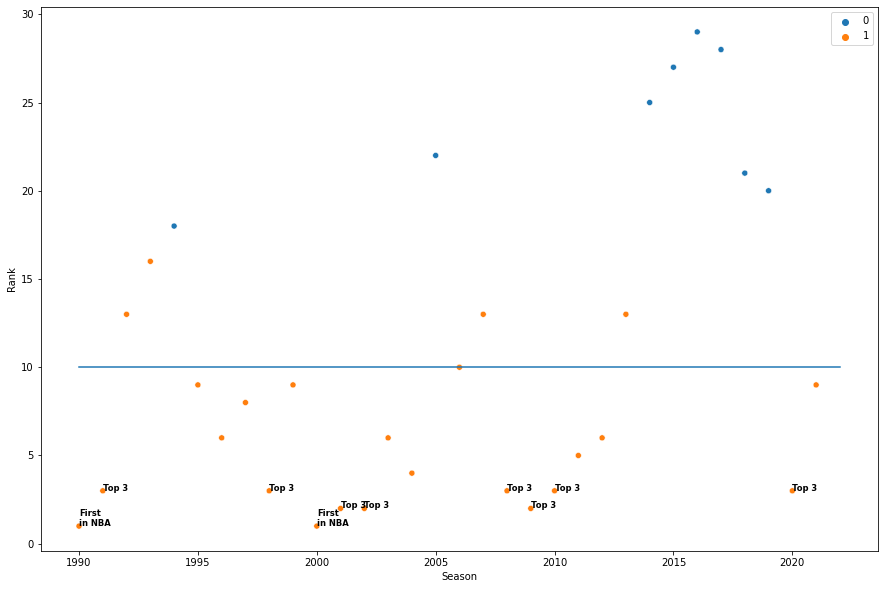

In [95]:
team_filter = lambda team: season_total_stats_full_dataset_interim_1990_2022_df[season_total_stats_full_dataset_interim_1990_2022_df.Team == team]
lakers = team_filter('Los Angeles Lakers')

plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x = 'Season',
    y = 'Rank',
    hue = 'Playoffs',
    data = lakers
)

for year, rank in lakers[["Season","Rank"]].itertuples(index=False):
    if rank == 1:
        plt.text(year, rank, "First\nin NBA", horizontalalignment='left', size='small', color='black', weight='semibold')
        continue
    if rank <= 3:
        plt.text(year, rank, "Top 3", horizontalalignment='left', size='small', color='black', weight='semibold')
    

sns.lineplot(
    y = int(lakers['Rank'].mean()),
    x = lakers['Season']
)

ax.set_xticks = lakers.Season.values
plt.show()